# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [3]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [4]:
df.shape

(81937, 15)

In [5]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

In [6]:
df = df[:30000]
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [7]:
# Each row is a dog that has been filed with the appropriate authority, and has been licensed.
# 'Animal Name' is the name each dog in the database has
# 'Application Date' is the date that the owner of each dog has filed for the dog's license.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [8]:
# What percentage of the dogs are vaccinated and what aren't?
# How many dog licenses expire within the next year?
# What are the top dog breeds licensed?
# How many guard dogs there are?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [9]:
df['Primary Breed'].value_counts().head(15)

Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Pomeranian                               539
Havanese                                 515
Golden Retriever                         501
Cocker Spaniel                           490
Name: Primary Breed, dtype: int64

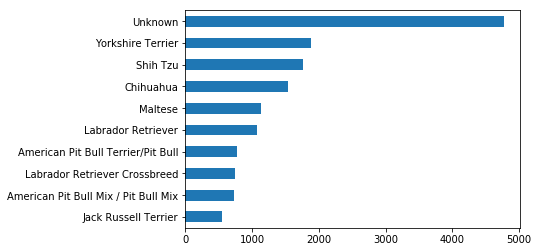

In [10]:
df['Primary Breed'].value_counts().head(10).sort_values(ascending = True).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [11]:
breed_unknown = df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts()
breed_unknown.head(15)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Pomeranian                               539
Havanese                                 515
Golden Retriever                         501
Cocker Spaniel                           490
German Shepherd Dog                      422
Name: Primary Breed, dtype: int64

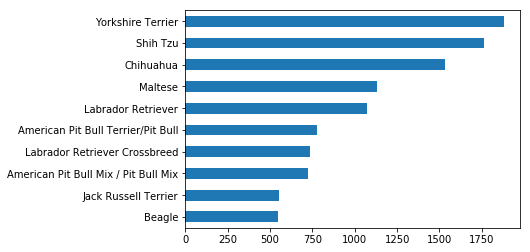

In [12]:
breed_unknown.sort_values(ascending=True).tail(10).plot(kind='barh')

## What are the most popular dog names?

In [13]:
df['Animal Name'].value_counts().head(10)

UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Name: Animal Name, dtype: int64

In [14]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values=['Unknown', 'UNKNOWN', 'unknown', 'NO NAME'])
df = df[:30000]

df['Animal Name'].value_counts().head(10)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [15]:
name_dem = df[df['Animal Name'] == 'Demetrios']['Animal Name'].value_counts()
name_dem

Series([], Name: Animal Name, dtype: int64)

In [16]:
name_max = df[df['Animal Name'] == 'Max']['Animal Name'].value_counts()
name_max

Max    202
Name: Animal Name, dtype: int64

In [17]:
name_maxwell = df[df['Animal Name'] == 'Maxwell']['Animal Name'].value_counts()
name_maxwell

Maxwell    11
Name: Animal Name, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [18]:
df[df['Guard or Trained'] == 'Yes']['Guard or Trained'].value_counts(normalize = True)

Yes    1.0
Name: Guard or Trained, dtype: float64

In [19]:
# Alternatively
guard_dogs_number = df[df['Guard or Trained'] == 'Yes']['Guard or Trained'].value_counts()

guard_dogs_pc = guard_dogs_number / len(df)
guard_dogs_pc = guard_dogs_pc * 100
guard_dogs_pc

Yes    0.056667
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [20]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [21]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


In [22]:
df['Guard or Trained'].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [23]:
df['Guard or Trained'].fillna('No').value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [24]:
df_guard = df[df['Guard or Trained'] == 'Yes']
df_guard.groupby('Primary Breed')["Guard or Trained"].value_counts().sort_values(ascending=False)

Primary Breed               Guard or Trained
German Shepherd Dog         Yes                 3
Yorkshire Terrier           Yes                 1
Shih Tzu                    Yes                 1
Schnauzer, Miniature        Yes                 1
Rottweiler                  Yes                 1
Poodle, Standard            Yes                 1
Labrador Retriever          Yes                 1
Golden Retriever            Yes                 1
German Shepherd Crossbreed  Yes                 1
Doberman Pinscher           Yes                 1
Name: Guard or Trained, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [25]:
df['Year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [26]:
df['Age'] = 2017 - df['Year']

In [27]:
df['Age'].mean()

7.7124333333333333

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [28]:
df_boro = pd.read_csv("zipcodes-neighborhoods.csv")
df_boro.head(5)

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [29]:
df_combined = df.merge(df_boro, left_on='Owner Zip Code', right_on='zip')
df_combined

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan
5,10024,Barney,M,Beagle,NaN,BROWN,WHITE,ORANGE,2004-06-01,Yes,No,Yes,2014-09-29 15:58:56.570,2014-09-29,2016-10-01,2004,13,Upper West Side,10024,Manhattan
6,10024,Peyton,M,NaN,Black Mouth Cur,BRINDLE,BLACK,NaN,2012-08-01,Yes,No,Yes,2014-10-02 11:23:37.220,2014-10-02,2016-09-24,2012,5,Upper West Side,10024,Manhattan
7,10024,Phoebe,F,Cavalier King Charles Spaniel,NaN,GOLD,APRICOT,WHITE,2009-01-01,Yes,No,Yes,2014-10-06 15:13:32.223,2014-10-06,2016-10-25,2009,8,Upper West Side,10024,Manhattan
8,10024,Baci,F,Dachshund,NaN,Black,Tan,NaN,2013-02-01,Yes,NaN,Yes,2014-10-06 20:05:14.213,2014-10-06,2016-10-06,2013,4,Upper West Side,10024,Manhattan
9,10024,Delilah Eddy,F,German Shepherd Crossbreed,NaN,BLACK,TAN,NaN,2007-05-01,Yes,No,Yes,2014-10-09 13:55:43.907,2014-10-09,2019-10-11,2007,10,Upper West Side,10024,Manhattan


In [30]:
# df_combined.groupby('borough')['Animal Name'].value_counts().groupby(level=0).head()

df_combined_bronx = df_combined[df_combined['borough'] == 'Bronx']
df_combined_bronx['Animal Name'].value_counts().head(10)

Bella       22
Max         21
Rocky       20
Princess    15
Lucky       15
Coco        14
Buddy       13
Luna        13
Charlie     12
Lola        11
Name: Animal Name, dtype: int64

In [31]:
df_combined_brook = df_combined[df_combined['borough'] == 'Brooklyn']
df_combined_brook['Animal Name'].value_counts().head(10)

Max                      46
Bella                    45
Charlie                  42
Rocky                    36
Lucy                     32
Lucky                    32
Princess                 29
Lola                     27
Dog Name Not Provided    26
Luna                     24
Name: Animal Name, dtype: int64

In [32]:
df_combined_upea = df_combined[df_combined['neighborhood'] == 'Upper East Side']
df_combined_upea['Animal Name'].value_counts().head(10)

Charlie    19
Bella      12
Lola       10
Lucy       10
Molly       9
Buddy       9
Oliver      9
Penny       8
Bailey      8
Maddie      8
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [33]:
df_combined.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).head(1)

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

## What breed of dogs are the least likely to be spayed? Male or female?

In [34]:
df_breeds = df_combined['Primary Breed'].value_counts()
df_breeds = df_breeds.sort_index()

df_not_spayed = df_combined[df_combined['Spayed or Neut'] == 'No']['Primary Breed'].value_counts()
df_not_spayed = df_not_spayed.sort_index()

df_least_likely_spayed = df_not_spayed / df_breeds
df_least_likely_spayed = (df_not_spayed / df_breeds) * 100
df_least_likely_spayed.sort_values(ascending=False).head(10)

Polish Hound                           100.0
Treeing Tennessee Brindle              100.0
Mudi                                   100.0
Mastiff, Tibetan                       100.0
Borzoi                                 100.0
Canaan Dog                             100.0
Mastiff, French (Dogue de Bordeaux)    100.0
Dogo Argentino                         100.0
Kooikerhondje                          100.0
Karelian Bear Dog                      100.0
Name: Primary Breed, dtype: float64

In [35]:
df_gender = df_combined['Animal Gender'].value_counts()
df_not_spayed = df_combined[df_combined['Spayed or Neut'] == 'No']['Animal Gender'].value_counts()

df_least_likely_spayed = df_not_spayed / df_gender
df_least_likely_spayed = (df_not_spayed / df_gender) * 100
df_least_likely_spayed.sort_values(ascending=False)#.head(10)

#df_combined.groupby('Spayed or Neut')['Animal Gender'].value_counts()

M    20.867665
F    14.243542
           NaN
Name: Animal Gender, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [36]:
colors = ['black', 'white', 'grey']

dom_color = df_combined[df_combined['Animal Dominant Color'].str.lower().isin(colors)]
#dom_color
monochrome = dom_color[dom_color['Animal Secondary Color'].isnull()]
monochrome

# monochrome['Monochrome'] = True

monochrome.shape

(3905, 20)

## How many dogs are in each borough? Plot it in a graph.

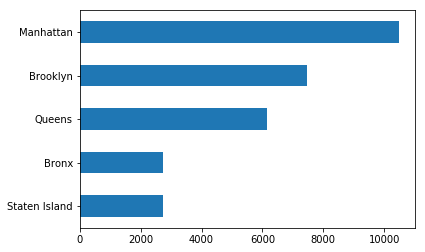

In [37]:
df_combined['borough'].value_counts().sort_values(ascending=True).plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [38]:
df_popul = pd.read_csv("boro_population.csv")
df_popul.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [39]:
df_pop = df_combined.merge(df_popul, left_on='borough', right_on='borough')
df_pop.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan,1644518,23
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,...,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan,1644518,23
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan,1644518,23
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,...,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan,1644518,23
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,...,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan,1644518,23


In [40]:
boro_populations = df_pop.groupby('borough')['population'].mean()
boro_populations.sort_index()

dog_populations = df_pop['borough'].value_counts()
dog_populations.sort_index()

per_capita = dog_populations / boro_populations
per_capita = per_capita.sort_values(ascending=False)
per_capita

Manhattan        0.006371
Staten Island    0.005746
Brooklyn         0.002832
Queens           0.002631
Bronx            0.001888
dtype: float64


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

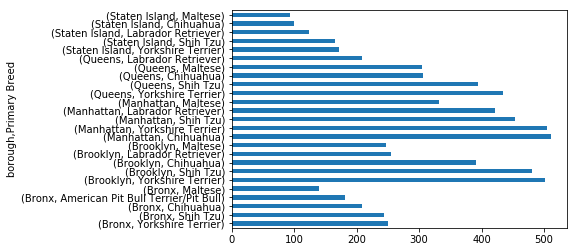

In [41]:
df_top_breeds = df_combined.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5)
df_top_breeds.plot(kind='barh')

## What percentage of dogs are not guard dogs?

In [42]:
df_combined['Guard or Trained'].value_counts(normalize=True)*100

No     99.918146
Yes     0.081854
Name: Guard or Trained, dtype: float64